# LMDZOR-STD-TEST

conda env: new `phd_v3`, old `work` (in `envs/phd`)

```fortran
frac_snow_veg(:) = tanh(snowdepth(:)/(0.025*(snowrho_ave(:)*(1+zstd_not_filtered(:)/200.)/50.)))
```

zstd physiq -> conveg compil ok (with Laurent)

 lmdz-zstd-to-condveg
@mickaellalande
mickaellalande committed 22 hours ago 
1 parent 8bcc93a commit fec3ee5485f5a946abc5cd26c3ecf6f0749c6610

- Jean-Zay WORK: `/gpfswork/rech/goe/ufz23bm/SCA_parameterization/modipsl/config/LMDZOR_v6/LMDZOR-STD-TEST`
- Jean-Zay STORE: `/gpfsscratch/rech/goe/ufz23bm/IGCM_OUT/LMDZOR/TEST/clim/LMDZOR-STD-TEST`
- THREDDS: `/gpfsdsmnt/ipsl/dods/pub/ufz23bm/IGCM_OUT/LMDZOR/TEST/clim/LMDZOR-STD-TEST/`
- CICLAD: `/thredds/idris/work/ufz23bm/IGCM_OUT/LMDZOR/TEST/clim/LMDZOR-STD-TEST/` 
- 



## Simu test (1 an):
- cp EXPERIMENTS/LMDZOR/clim_360d/config.card .
- gvim config.card
    - JobName=LMDZOR-STD-TEST
    - ATM= (gcm.e, lmdz.x, 71MPI, 5OMP)
- ../../libIGCM/ins_job
- cd LMDZOR-STD-TEST
- gvim COMP/lmdz.card
    - LMDZ_NMC_monthly=y  
    [InitialStateFiles]  
     List=	(/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZ/ELC-144x142x79-GMTED-STD/ATM/Output/Restart/ELC-144x142x79-GMTED-STD_clim_start.nc, start.nc),\
        (/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZ/ELC-144x142x79-GMTED-STD/ATM/Output/Restart/ELC-144x142x79-GMTED-STD_clim_startphy.nc, startphy.nc) 
    [BoundaryFiles]  
    ListNonDel= (/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZ/ELC-144x142x79-GMTED-STD/ATM/Output/Boundary/ELC-144x142x79-GMTED-STD_clim_limit.nc, limit.nc),\
- gvim Job_LMDZOR-STD-TEST
    - #SBATCH --time=02:00:00
    - #SBATCH --qos=qos_cpu-dev		# Queue test
- sbatch Job_LMDZOR-STD-TEST


## Import modules

In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '/home/mlalande/notebooks/utils') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
# u.check_virtual_memory()

3.8.5 | packaged by conda-forge | (default, Jul 24 2020, 01:25:15) 
[GCC 7.5.0]


In [2]:
xr.__version__

'0.16.0'

## Define paths

In [3]:
path_SRF = '/thredds/idris/work/ufz23bm/IGCM_OUT/LMDZOR/TEST/clim/LMDZOR-STD-TEST/SRF/Output/MO/'
path_ATM = '/thredds/idris/work/ufz23bm/IGCM_OUT/LMDZOR/TEST/clim/LMDZOR-STD-TEST/ATM/Output/MO/'

In [7]:
!ls {path_SRF}

LMDZOR-STD-TEST_19800101_19801230_1M_sechiba_history_4dim.nc
LMDZOR-STD-TEST_19800101_19801230_1M_sechiba_history.nc


In [8]:
!ls {path_ATM}

LMDZOR-STD-TEST_19800101_19801230_1M_histmth.nc     README
LMDZOR-STD-TEST_19800101_19801230_1M_histmthNMC.nc


In [5]:
ds_SRF_4dim = xr.open_dataset(path_SRF+'LMDZOR-STD-TEST_19800101_19801230_1M_sechiba_history_4dim.nc')
ds_SRF = xr.open_dataset(path_SRF+'LMDZOR-STD-TEST_19800101_19801230_1M_sechiba_history.nc')
ds_ATM = xr.open_dataset(path_ATM+'LMDZOR-STD-TEST_19800101_19801230_1M_histmth.nc')
ds_ATM_NMC = xr.open_dataset(path_ATM+'LMDZOR-STD-TEST_19800101_19801230_1M_histmthNMC.nc')

## ds_SRF_4dim

In [16]:
ds_SRF_4dim

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, lat: 143, lon: 144, soiltyp: 3, solay: 11, time_counter: 12, veget: 15)
Coordinates:
  * lat                   (lat) float32 90.0 88.73239 ... -88.73239 -90.0
  * lon                   (lon) float32 -180.0 -177.5 -175.0 ... 175.0 177.5
  * solay                 (solay) float32 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0 11.0
  * soiltyp               (soiltyp) float32 1.0 2.0 3.0
  * veget                 (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
    time_centered         (time_counter) object 1980-01-16 00:00:00 ... 1980-...
  * time_counter          (time_counter) object 1980-01-16 00:00:00 ... 1980-...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) object 1980-01-01 00:0...
    time_counter_bounds   (time_counter, axis_nbounds) object 1980-01-01 00:0...
    Areas                 (lat, lon) float32 nan nan nan nan ... nan nan nan nan
    Contfrac              (lat, lon) float32 nan nan nan nan ... nan nan nan nan
    moistc                (time_counter, soiltyp, solay, lat, lon) float32 ...
    kfactroot             (time_counter, soiltyp, solay, lat, lon) float32 ...
    vegetsoil             (time_counter, soiltyp, veget, lat, lon) float32 ...
    profil_froz_hydro_ns  (time_counter, soiltyp, solay, lat, lon) float32 ...
Attributes:
    name:         sechiba_history_4dim
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2020-Sep-30 10:39:22 GMT
    uuid:         9d4b94eb-ff0d-4708-8606-5dc15dcca8b7
    LongName:     LMDZOR configuration

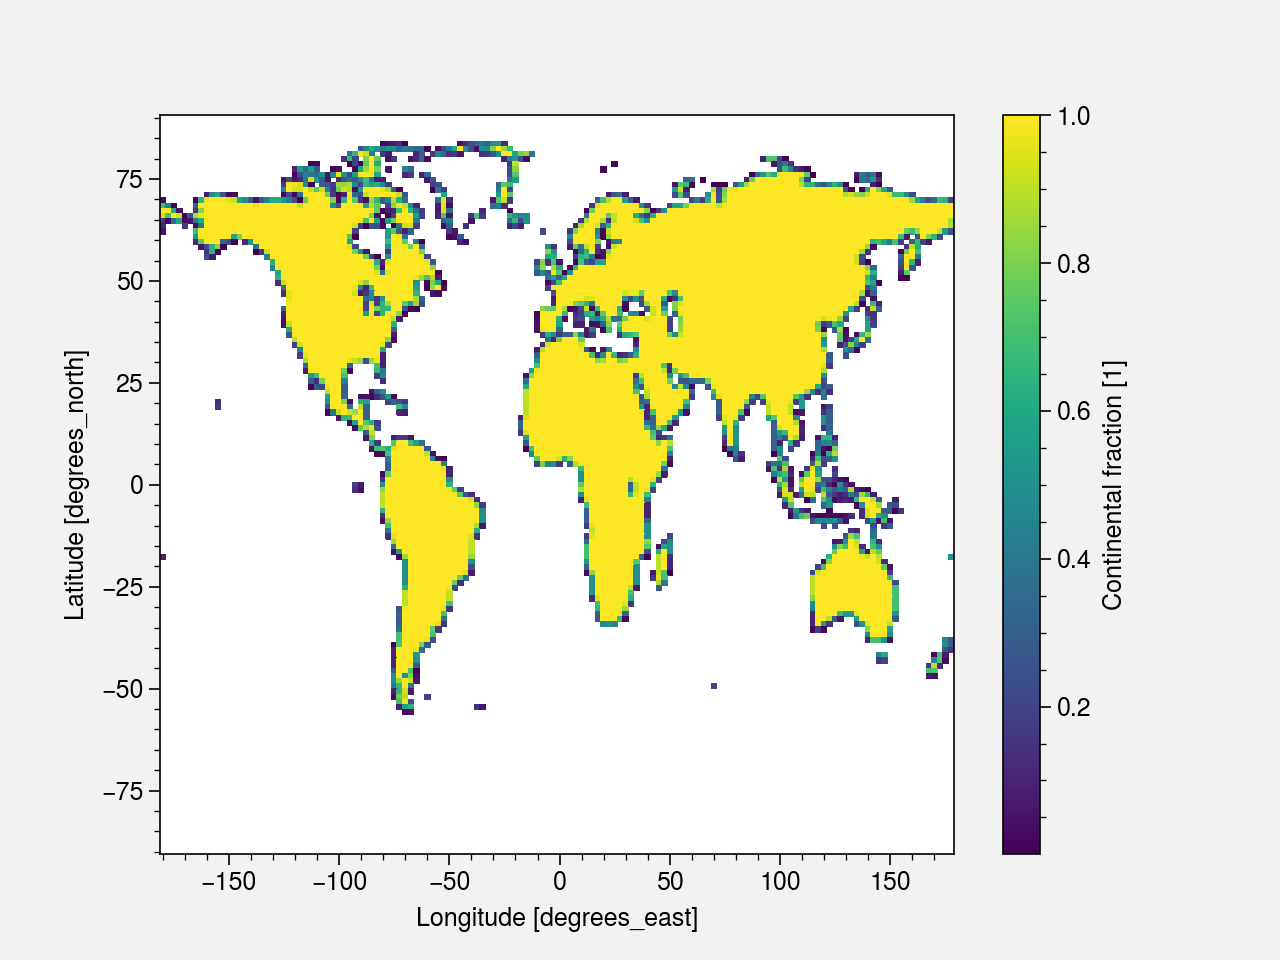

In [17]:
ds_SRF_4dim.Contfrac.plot()

## ds_SRF

In [6]:
ds_SRF

<xarray.Dataset>
Dimensions:                (albtyp: 2, axis_nbounds: 2, lat: 143, lon: 144, nlut: 4, nobio: 1, snowlev: 3, soiltyp: 3, solay: 11, solth: 18, time_counter: 12, veget: 15)
Coordinates:
  * lat                    (lat) float32 90.0 88.73239 ... -88.73239 -90.0
  * lon                    (lon) float32 -180.0 -177.5 -175.0 ... 175.0 177.5
  * solay                  (solay) float32 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0 11.0
  * veget                  (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * soiltyp                (soiltyp) float32 1.0 2.0 3.0
  * albtyp                 (albtyp) float32 1.0 2.0
  * nobio                  (nobio) float32 1.0
  * solth                  (solth) float32 0.00048875855 ... 65.56207
  * snowlev                (snowlev) float32 1.0 2.0 3.0
  * nlut                   (nlut) float32 1.0 2.0 3.0 4.0
    time_centered          (time_counter) object ...
  * time_counter           (time_counter) object 1980-01-16 00:00:00 ... 1980...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_centered_bounds   (time_counter, axis_nbounds) object ...
    time_counter_bounds    (time_counter, axis_nbounds) object ...
    Areas                  (lat, lon) float32 ...
    Contfrac               (lat, lon) float32 ...
    evap                   (time_counter, lat, lon) float32 ...
    coastalflow            (time_counter, lat, lon) float32 ...
    riverflow              (time_counter, lat, lon) float32 ...
    coastalflow_cpl        (time_counter, lat, lon) float32 ...
    riverflow_cpl          (time_counter, lat, lon) float32 ...
    temp_sol               (time_counter, lat, lon) float32 ...
    mrsow                  (time_counter, lat, lon) float32 ...
    ksat                   (solay, lat, lon) float32 ...
    rain                   (time_counter, lat, lon) float32 ...
    snowf                  (time_counter, lat, lon) float32 ...
    netrad                 (time_counter, lat, lon) float32 ...
    lai                    (time_counter, veget, lat, lon) float32 ...
    reinf_slope            (lat, lon) float32 ...
    soilindex              (lat, lon) float32 ...
    basinmap               (lat, lon) float32 ...
    nbrivers               (lat, lon) float32 ...
    npp                    (time_counter, veget, lat, lon) float32 ...
    WaterTableD            (time_counter, lat, lon) float32 ...
    TWS                    (time_counter, lat, lon) float32 ...
    subli                  (time_counter, lat, lon) float32 ...
    runoff                 (time_counter, lat, lon) float32 ...
    drainage               (time_counter, lat, lon) float32 ...
    riversret              (time_counter, lat, lon) float32 ...
    hydrographs            (time_counter, lat, lon) float32 ...
    evapnu                 (time_counter, lat, lon) float32 ...
    evapnu_soil            (time_counter, soiltyp, lat, lon) float32 ...
    drainage_soil          (time_counter, soiltyp, lat, lon) float32 ...
    transpir_soil          (time_counter, soiltyp, lat, lon) float32 ...
    runoff_soil            (time_counter, soiltyp, lat, lon) float32 ...
    tair                   (time_counter, lat, lon) float32 ...
    qair                   (time_counter, lat, lon) float32 ...
    q2m                    (time_counter, lat, lon) float32 ...
    t2m                    (time_counter, lat, lon) float32 ...
    soilalb_bg             (albtyp, lat, lon) float32 ...
    alb_vis                (time_counter, lat, lon) float32 ...
    alb_nir                (time_counter, lat, lon) float32 ...
    soilalb_vis            (time_counter, lat, lon) float32 ...
    soilalb_nir            (time_counter, lat, lon) float32 ...
    vegalb_vis             (time_counter, lat, lon) float32 ...
    vegalb_nir             (time_counter, lat, lon) float32 ...
    z0h                    (time_counter, lat, lon) float32 ...
    z0m                    (time_counter, lat, lon) float32 ...
    roughheight            (time_counter, lat, lo

In [24]:
ds_SRF.nobiofrac.max().values

array(0., dtype=float32)

Il n'y a pas de nobio ?

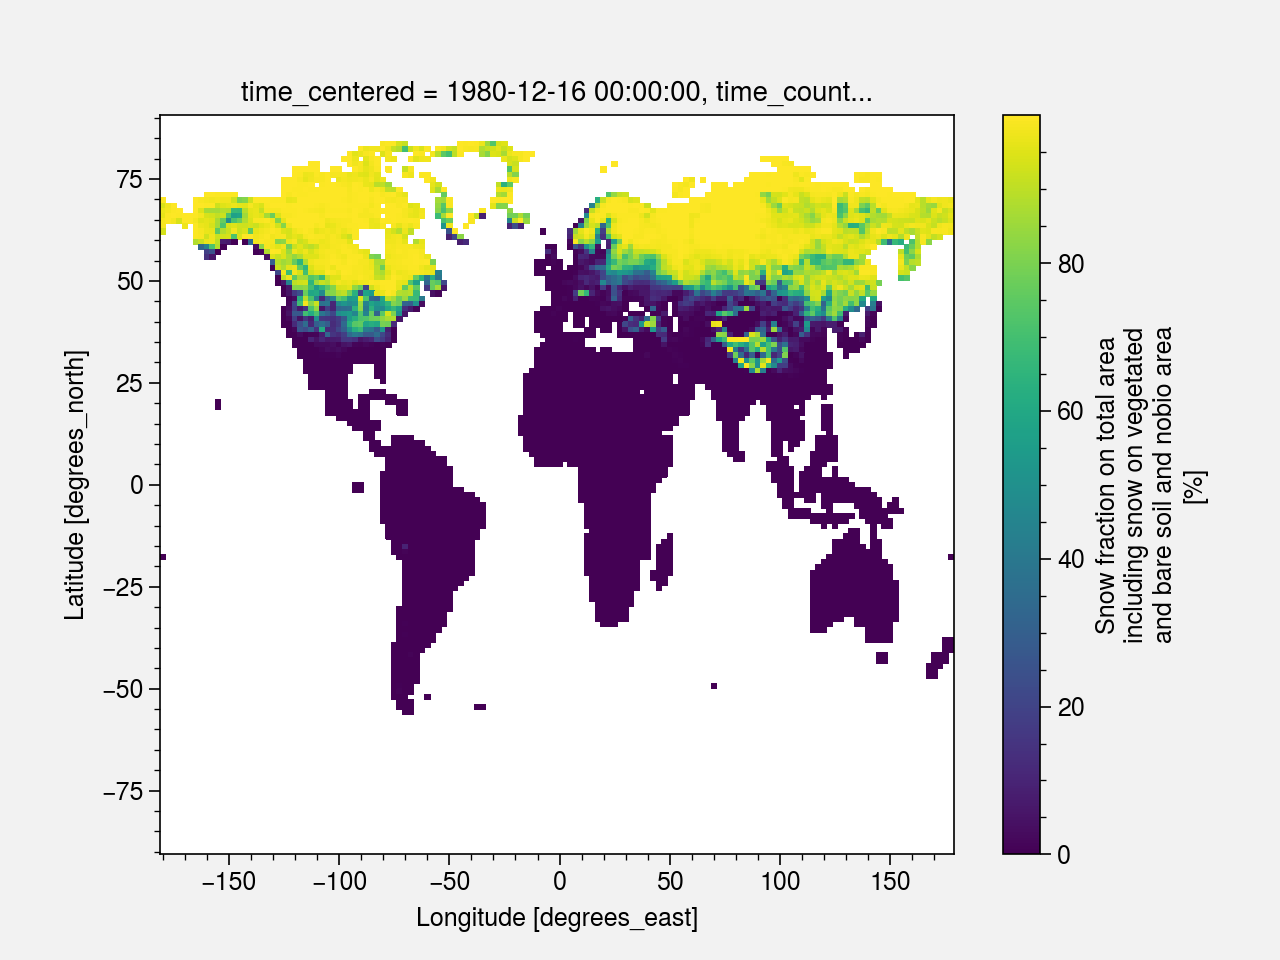

In [28]:
ds_SRF.frac_snow[11].plot()

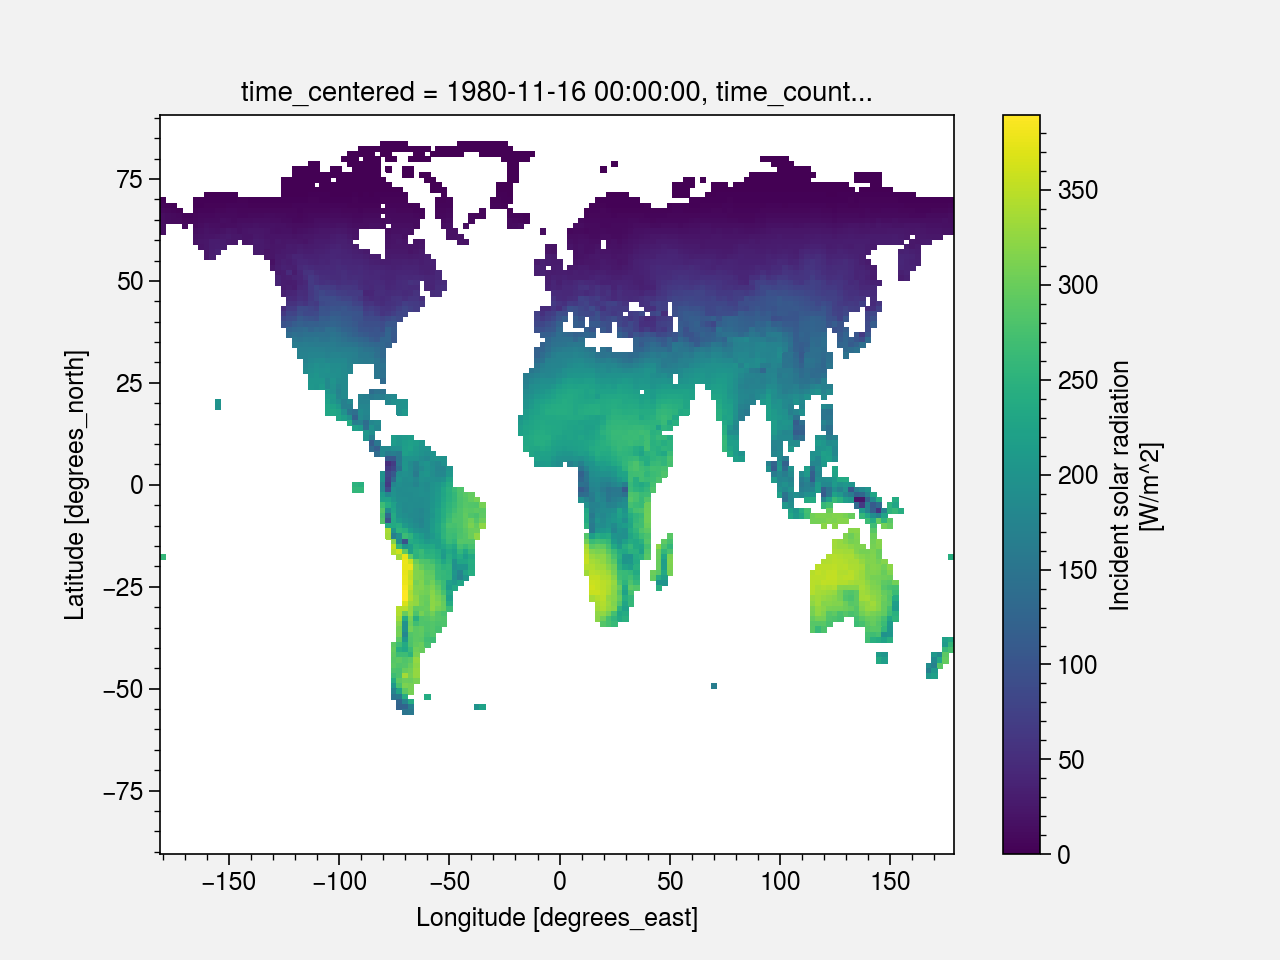

In [32]:
ds_SRF.swdown[10].plot()

## Check HMA

In [38]:
latlim, lonlim = u.get_domain_HMA()
latlim = slice(latlim.stop, latlim.start)

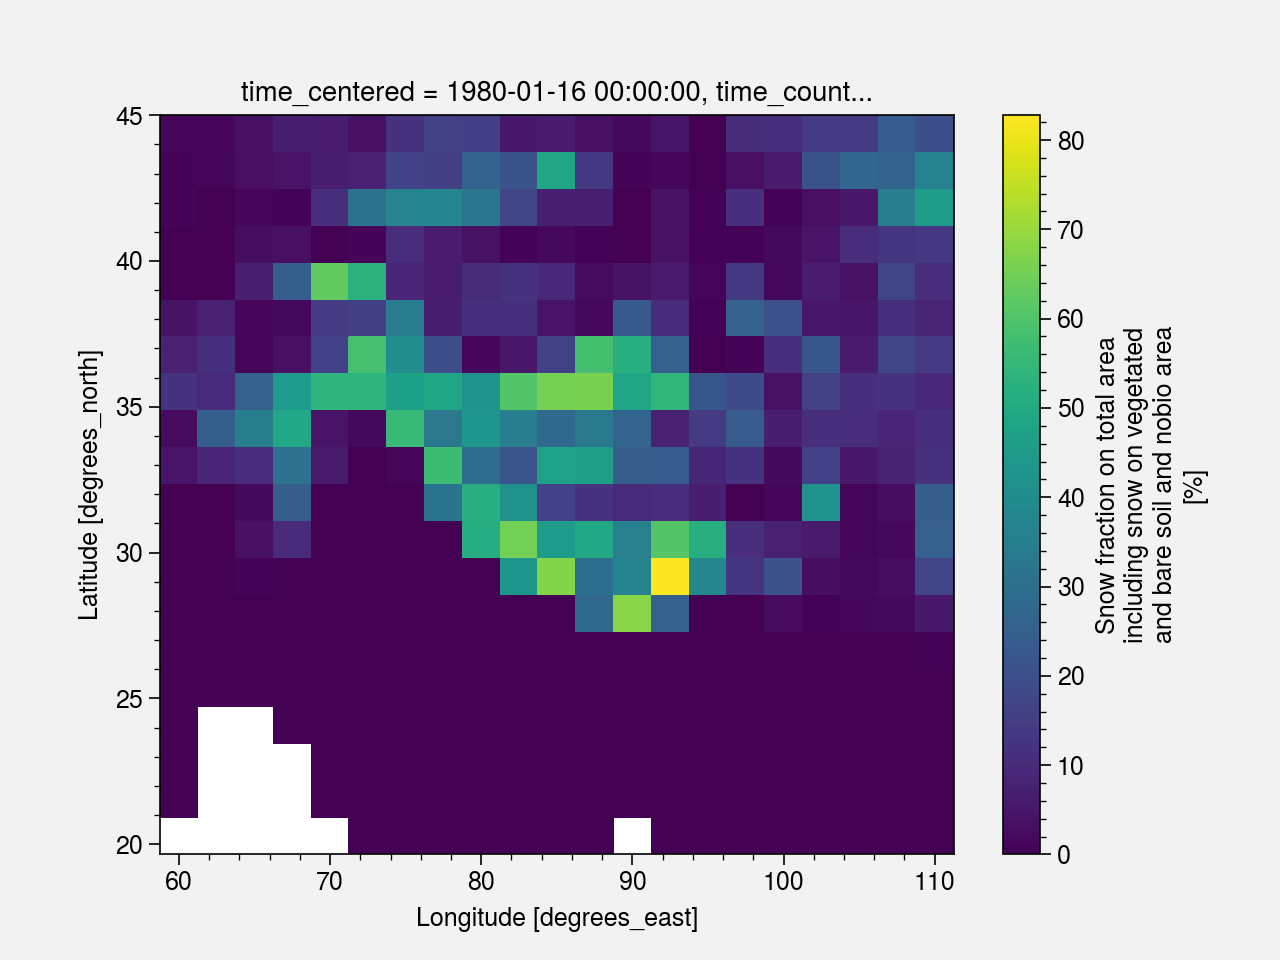

In [40]:
ds_SRF.sel(lat=latlim, lon=lonlim).frac_snow[0].plot()

In [41]:
# 3 100% points Karakoram, north-est, Himalaya
lat_100 = [35.492958, 29.15493, 29.15493, 38.028168]
lon_100 = [77.5, 82.5, 85.0, 97.5]
dx = 2.5
dy = 1.2676

In [43]:
def select_pixels(axs, lat, lon, dx, dy):
    for ax in axs:
        for i in range(len(lat)):
            ax.add_patch(
                Rectangle(
                    xy=[lon[i]-dx/2, lat[i]-dy/2], width=dx, height=dy, 
                    fill=False, color='C'+str(i), lw=4
                )
            )

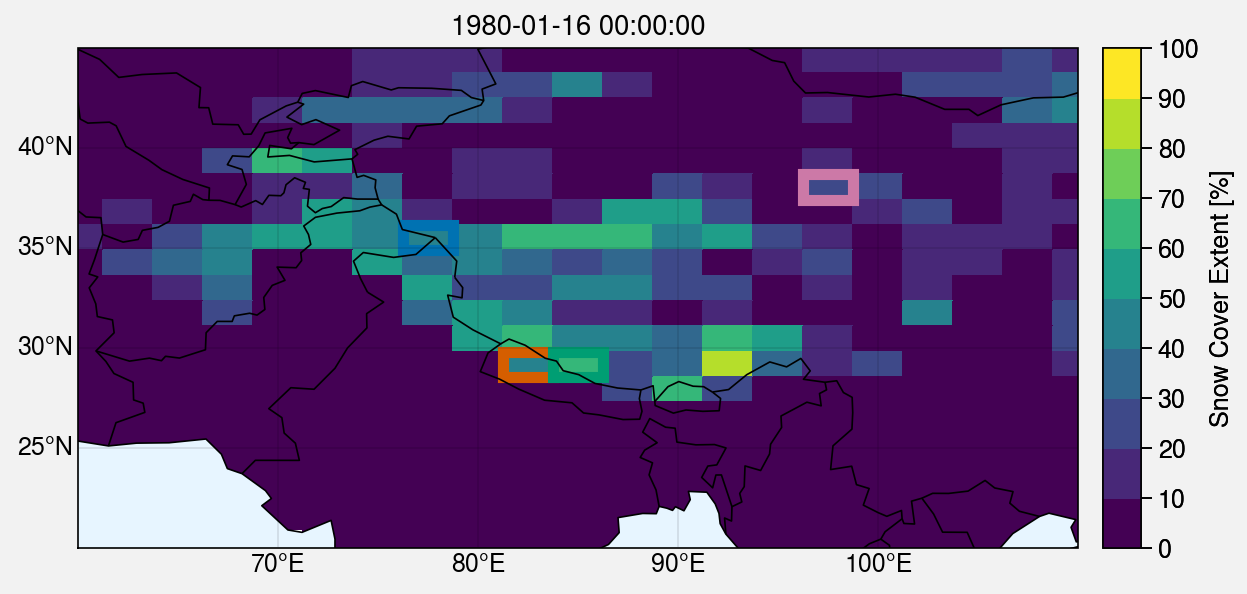

In [64]:
from matplotlib.patches import Rectangle # For rectangles

f, axs = plot.subplots(ncols=1, nrows=1, proj='cyl', axwidth=5)

data = ds_SRF.sel(lat=latlim, lon=lonlim).frac_snow[0]

m = axs[0].pcolormesh(data, cmap='viridis', levels=plot.arange(0,100,10))
axs[0].format(title=data.time_counter.values)
f.colorbar(m, label='Snow Cover Extent [%]')

select_pixels(axs, lat_100, lon_100, dx, dy)

axs.format(
    labels=True, coast=True, ocean=True, oceancolor='blue0', borders=True,
    latlim=(latlim.stop, latlim.start), lonlim=(lonlim.start, lonlim.stop)
)

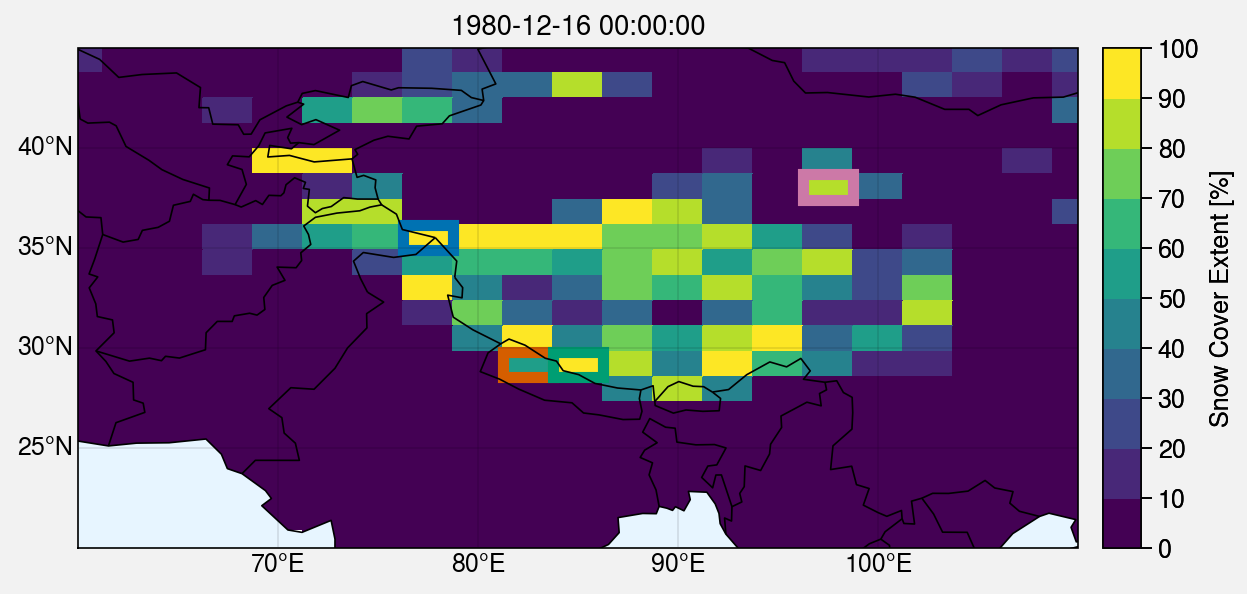

In [65]:
from matplotlib.patches import Rectangle # For rectangles

f, axs = plot.subplots(ncols=1, nrows=1, proj='cyl', axwidth=5)

data = ds_SRF.sel(lat=latlim, lon=lonlim).frac_snow[-1]

m = axs[0].pcolormesh(data, cmap='viridis', levels=plot.arange(0,100,10))
axs[0].format(title=data.time_counter.values)
f.colorbar(m, label='Snow Cover Extent [%]')

select_pixels(axs, lat_100, lon_100, dx, dy)

axs.format(
    labels=True, coast=True, ocean=True, oceancolor='blue0', borders=True,
    latlim=(latlim.stop, latlim.start), lonlim=(lonlim.start, lonlim.stop)
)

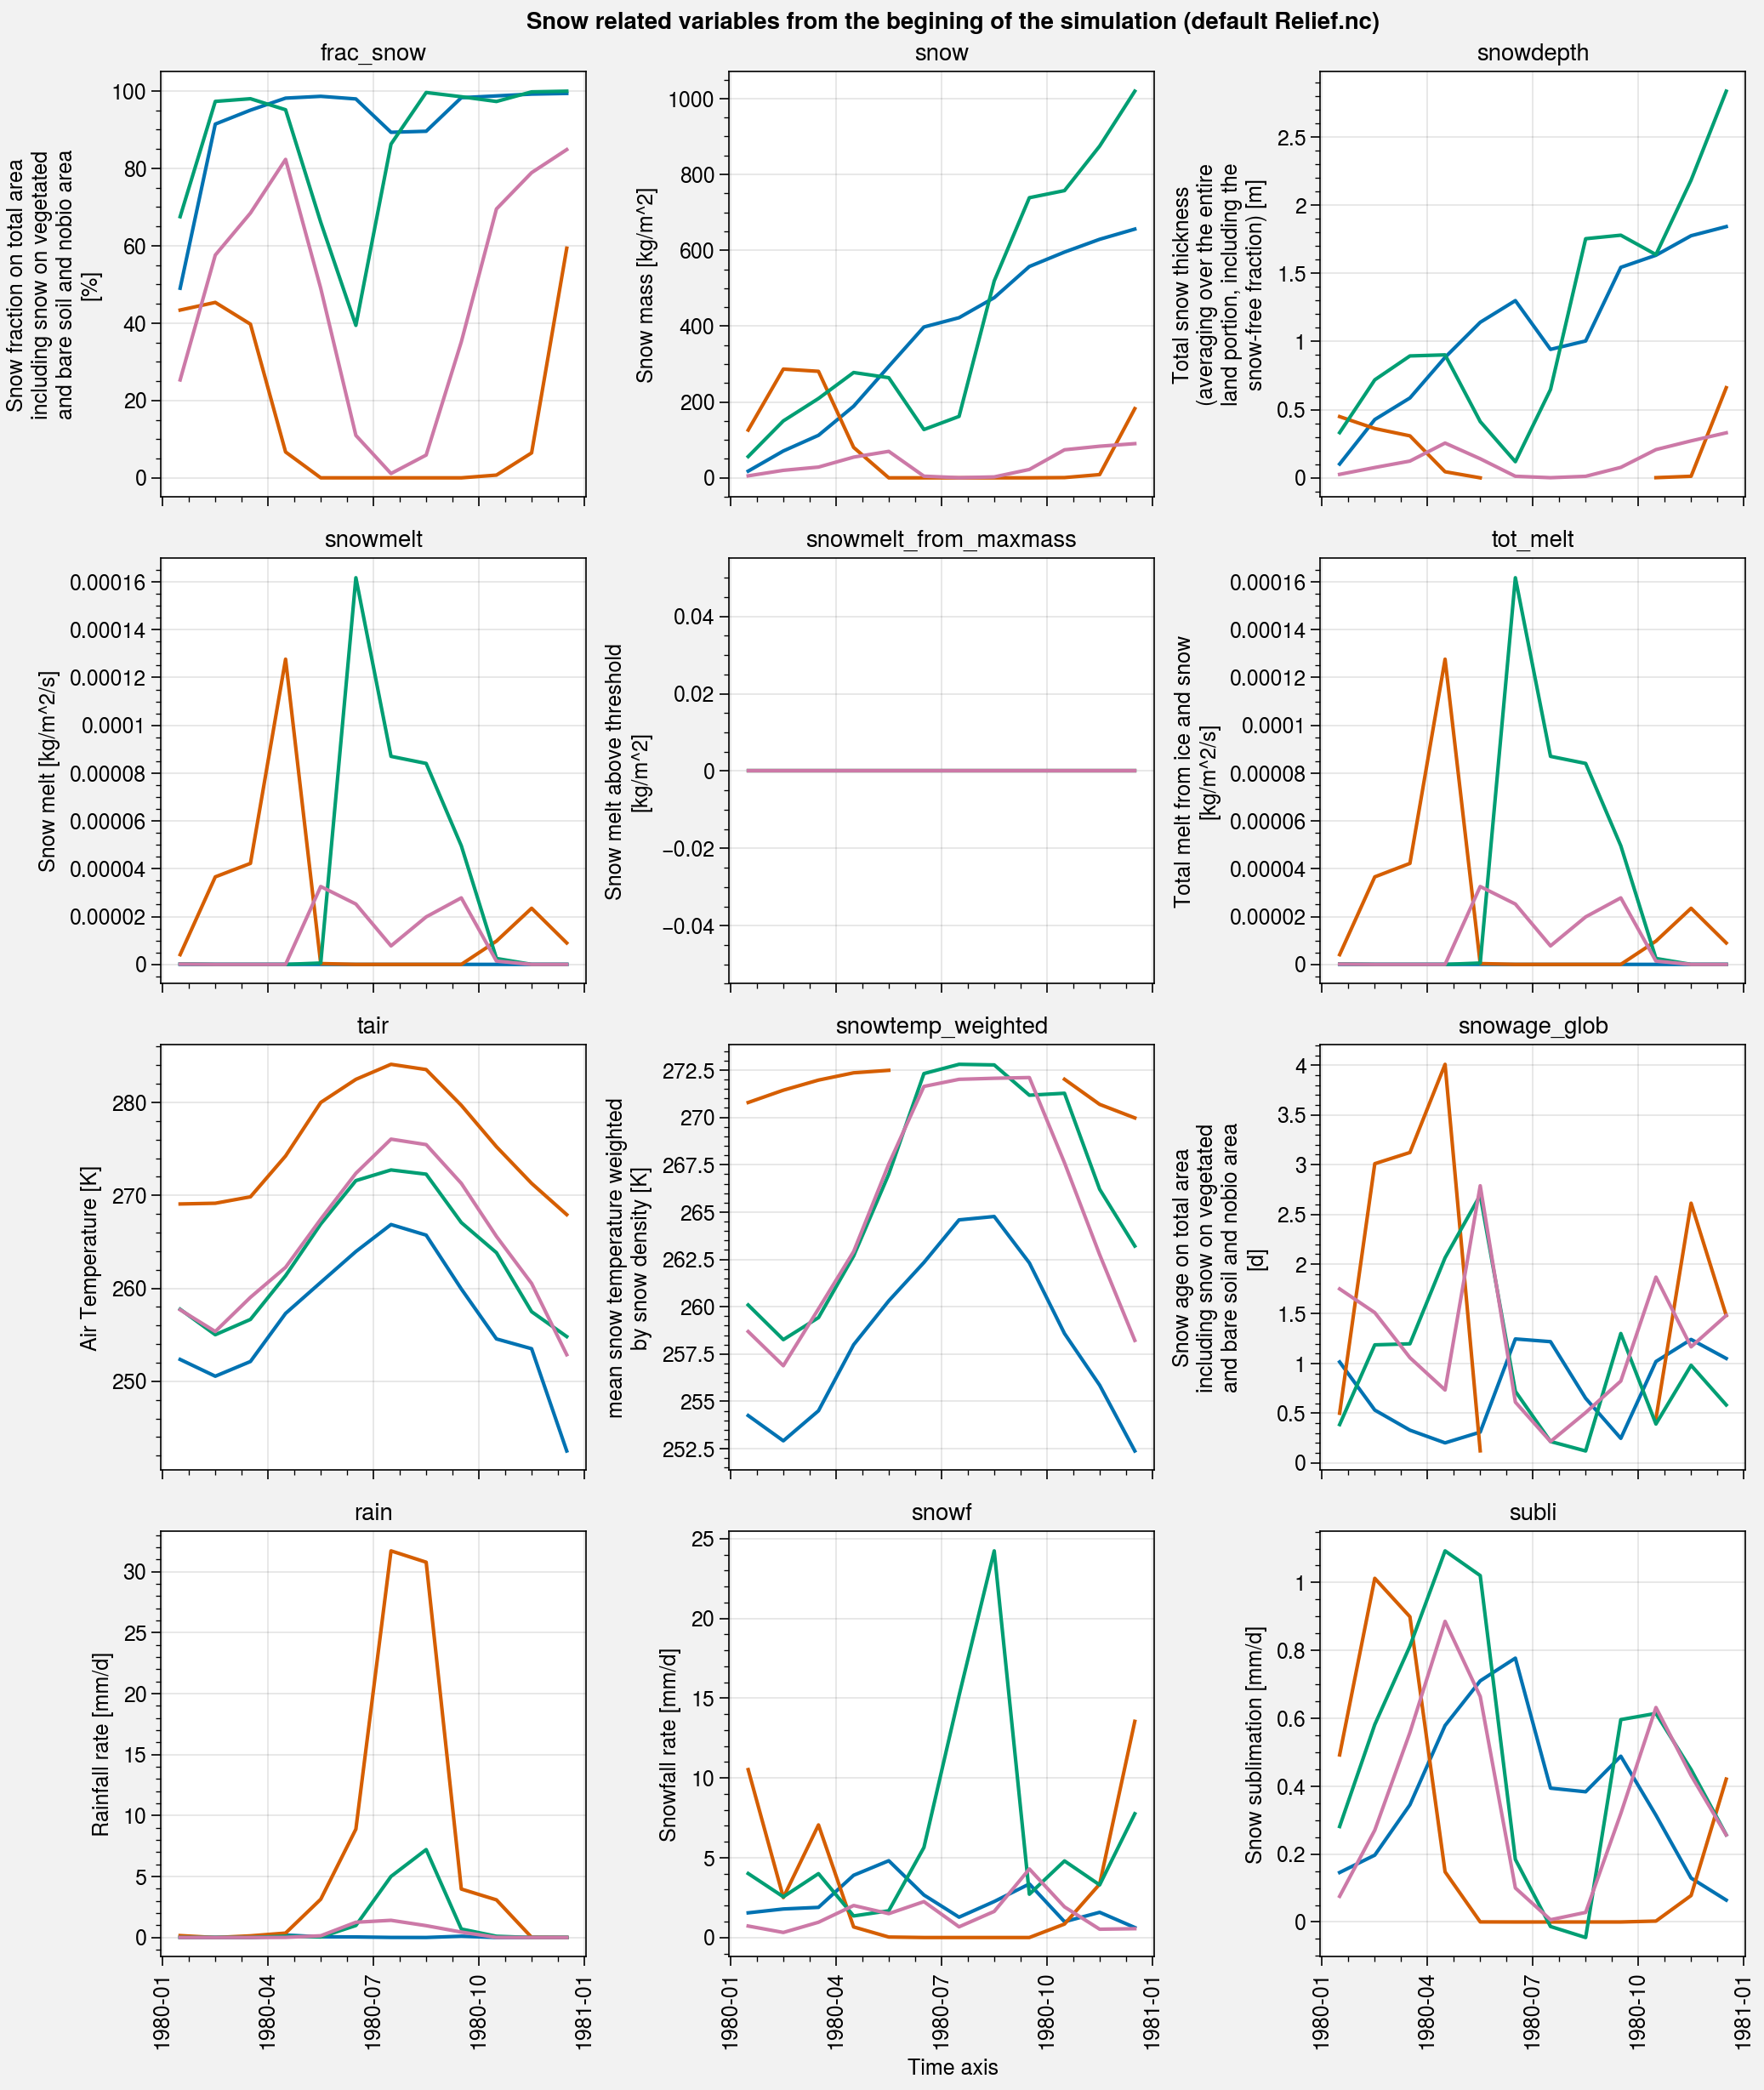

In [66]:
n = len(lat_100)
variables = [
    'frac_snow','snow', 'snowdepth', 
    'snowmelt', 'snowmelt_from_maxmass', 'tot_melt',
    'tair', 'snowtemp_weighted', 'snowage_glob', 
    'rain', 'snowf', 'subli'
]

f, axs = plot.subplots(ncols=3, nrows=4, sharey=0)

hs = []
for k, variable in enumerate(variables):
    for i in range(n):
        ds_SRF[variable].sel(lat=lat_100[i], lon=lon_100[i]).plot(ax=axs[k])
        axs[k].format(title=variable)
        
axs.format(suptitle='Snow related variables from the begining of the simulation (default Relief.nc)')